Testing the inertial oscillation: rn_ahm_0_lap = 125, rn_max_sponge = 500, nn_rimwidth = 10.

In [1]:
! grep nn_tau000 /ocean/imachuca/Canyons/results_mackenzie/idealized/upwelling_events/sponge05/namelist_cfg

   nn_tau000   =   2160   !  gently increase the stress over the first ntau_rst time-steps


In [2]:
! grep nn_tau000 /ocean/imachuca/Canyons/results_mackenzie/idealized/upwelling_events/eventB_pulse10/namelist_cfg

   nn_tau000   =   3600   !  gently increase the stress over the first ntau_rst time-steps


In [11]:
! grep nn_tau002 /ocean/imachuca/Canyons/results_mackenzie/idealized/upwelling_events/eventB_pulse10/namelist_cfg

   nn_tau002   =   25920  !  IAM - start of third stage


In [1]:
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import cmocean as cmo
from matplotlib.dates import DateFormatter
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot
import functions_profiles
import functions_upwelling_depth
import functions_velocity

from salishsea_tools import nc_tools, viz_tools
from salishsea_tools import gsw_calls

import xarray as xr

In [2]:
path = '/ocean/imachuca/Canyons/results_mackenzie/idealized/upwelling_events/'; cfg = 'eventB_pulse10'
grid = xr.open_dataset(path+cfg+'/GYRE_1h_00010101_00010120_grid_T.nc')
gridU = xr.open_dataset(path+cfg+'/GYRE_1h_00010101_00010120_grid_U.nc')
gridV = xr.open_dataset(path+cfg+'/GYRE_1h_00010101_00010120_grid_V.nc')
gridW = xr.open_dataset(path+cfg+'/GYRE_1h_00010101_00010120_grid_W.nc')
U = gridU['vozocrtx']
V = gridV['vomecrty']
utau = gridU['sozotaux']
vtau = gridV['sometauy']
ev = gridW['veddyvisc']
depth_levels = grid['deptht'][:]

In [3]:
bathy_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_05.nc')
bathy = bathy_file['Bathymetry']

coord_lats = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/coordinates/NEMO_files/coords_02.nc')['nav_lat'][:]

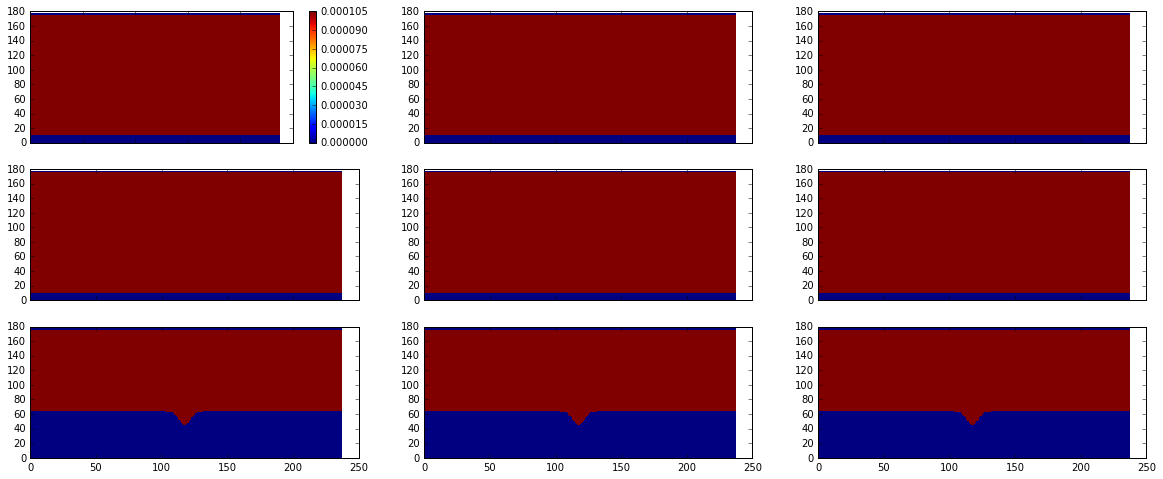

In [4]:
fig, ([ax1, ax2, ax3],[ax4, ax5, ax6],[ax7, ax8, ax9]) = plt.subplots(3,3,figsize=(20,8), sharex=True)
p = ax1.pcolor(ev[200,0,:,:], vmin = 0, vmax=0.000105)
fig.colorbar(p, ax=ax1)
p = ax2.pcolor(ev[203,0,:,:], vmin = 0, vmax=0.000105)
p = ax3.pcolor(ev[206,0,:,:], vmin = 0, vmax=0.000105)
p = ax4.pcolor(ev[200,1,:,:], vmin = 0, vmax=0.000105)
p = ax5.pcolor(ev[203,1,:,:], vmin = 0, vmax=0.000105)
p = ax6.pcolor(ev[206,1,:,:], vmin = 0, vmax=0.000105)
p = ax7.pcolor(ev[200,12,:,:], vmin = 0, vmax=0.000105)
p = ax8.pcolor(ev[203,12,:,:], vmin = 0, vmax=0.000105)
p = ax9.pcolor(ev[206,12,:,:], vmin = 0, vmax=0.000105)

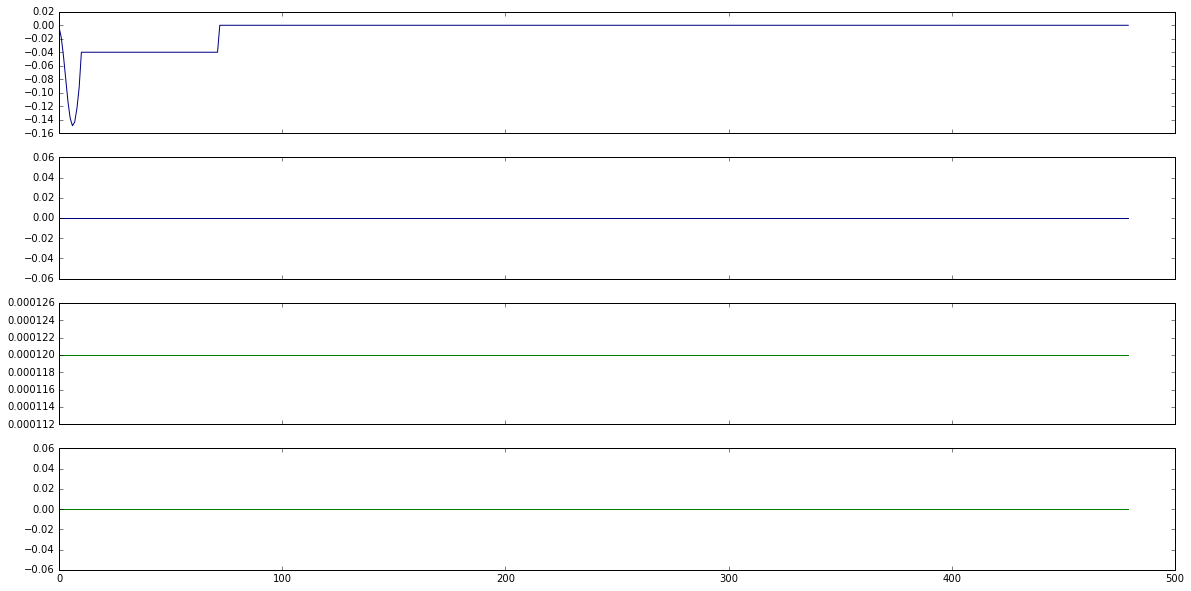

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(20,10), sharex=True)
ax1.plot(utau[:,100,100], c='navy')
ax2.plot(vtau[:,100,100], c='navy')
ax3.plot(ev[:,0,100,100], c='navy')
ax3.plot(ev[:,2,100,100], c='r')
ax3.plot(ev[:,4,100,100], c='b')
ax3.plot(ev[:,7,100,100], c='g')
ax4.plot(ev[:,0,176,100], c='navy')
ax4.plot(ev[:,2,176,100], c='r')
ax4.plot(ev[:,4,176,100], c='b')
ax4.plot(ev[:,7,176,100], c='g')

In [5]:
utau[:80,100,100]

<xarray.DataArray 'sozotaux' (time_counter: 80)>
array([-0.00275653, -0.01852737, -0.04660851, -0.08087862, -0.11386727,
       -0.13838336, -0.14908271, -0.14363299, -0.12322217, -0.09229956,
       -0.04      , -0.04      , -0.04      , -0.04      , -0.04      ,
       -0.04      , -0.04      , -0.04      , -0.04      , -0.04      ,
       -0.04      , -0.04      , -0.04      , -0.04      , -0.04      ,
       -0.04      , -0.04      , -0.04      , -0.04      , -0.04      ,
       -0.04      , -0.04      , -0.04      , -0.04      , -0.04      ,
       -0.04      , -0.04      , -0.04      , -0.04      , -0.04      ,
       -0.04      , -0.04      , -0.04      , -0.04      , -0.04      ,
       -0.04      , -0.04      , -0.04      , -0.04      , -0.04      ,
       -0.04      , -0.04      , -0.04      , -0.04      , -0.04      ,
       -0.04      , -0.04      , -0.04      , -0.04      , -0.04      ,
       -0.04      , -0.04      , -0.04      , -0.04      , -0.04      ,
       -0.04   

# U Velocity
### Along NS transect for varying depths

period [hrs]:  12


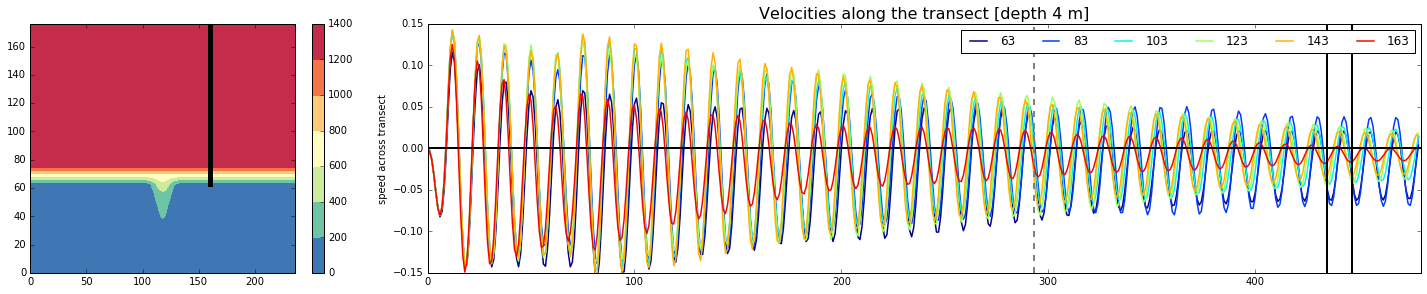

In [6]:
constant, p_min, p_max, depth_ind, interval, flag = 160, 63, 176, 0, 20, 'vertical_vel'
fig, ax2 = functions_velocity.plot_speed_evolution(U, V, bathy, depth_levels, constant, p_min, p_max, depth_ind, interval, flag)
ax2.axvline(293, c = 'gray', linewidth=2, linestyle = '--')

period [hrs]:  12


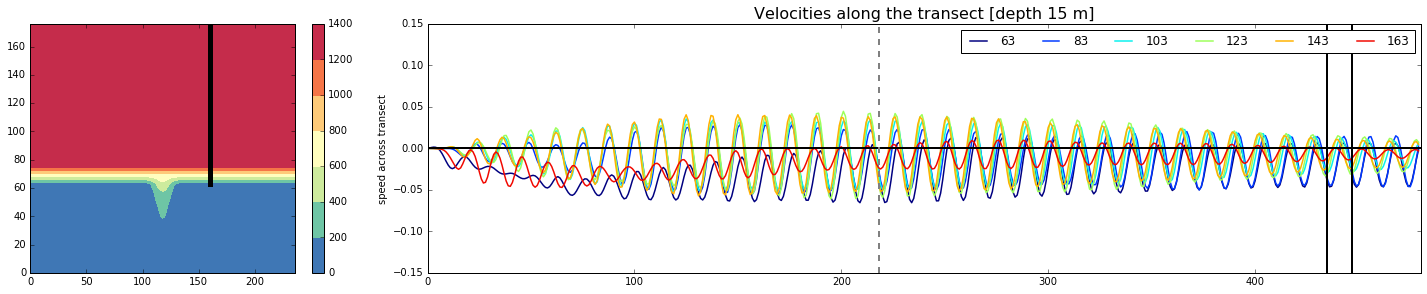

In [7]:
fig, ax2 = functions_velocity.plot_speed_evolution(U, V, bathy, depth_levels, constant, p_min, p_max, 1, interval, flag)
ax2.axvline(218, c = 'gray', linewidth=2, linestyle = '--')

Minor change. Oscillations before dashed lines are slightly pushed up.

period [hrs]:  12


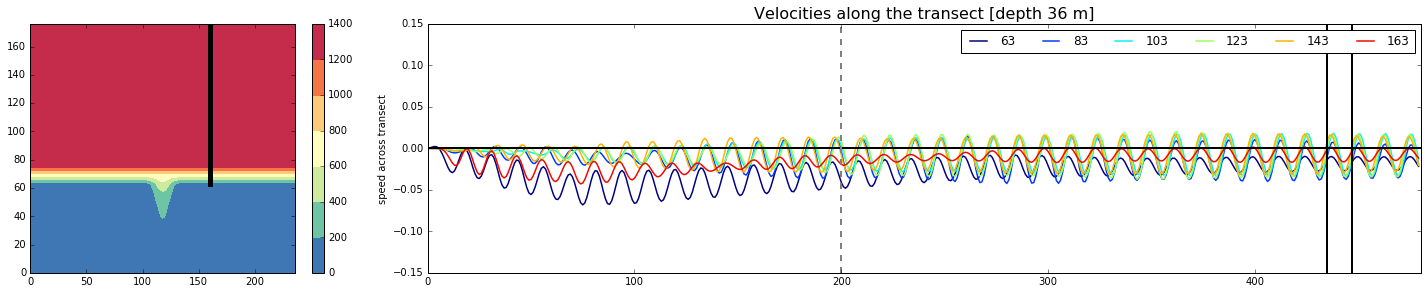

In [8]:
fig, ax2 = functions_velocity.plot_speed_evolution(U, V, bathy, depth_levels, constant, p_min, p_max, 3, interval, flag)
ax2.axvline(200, c = 'gray', linewidth=2, linestyle = '--')

Minor change. Oscillations before dashed lines are slightly pushed up.

period [hrs]:  12


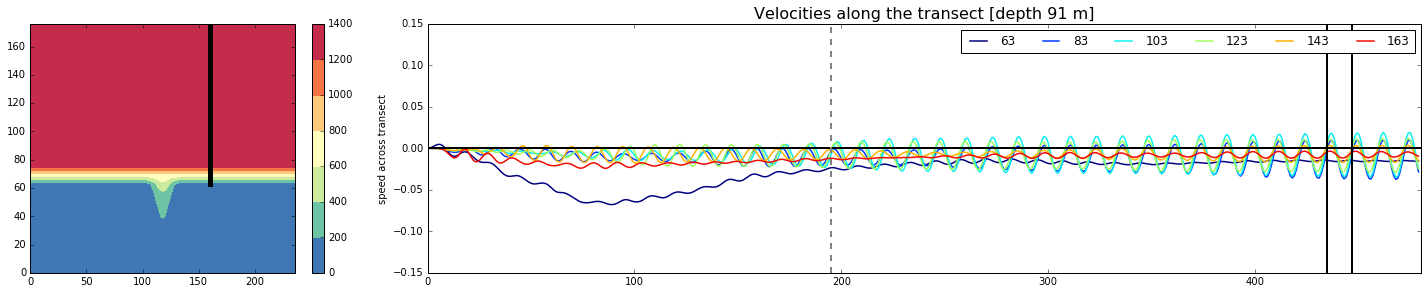

In [9]:
fig, ax2 = functions_velocity.plot_speed_evolution(U, V, bathy, depth_levels, constant, p_min, p_max, 7, interval, flag)
ax2.axvline(195, c = 'gray', linewidth=2, linestyle = '--')

No change.

period [hrs]:  12


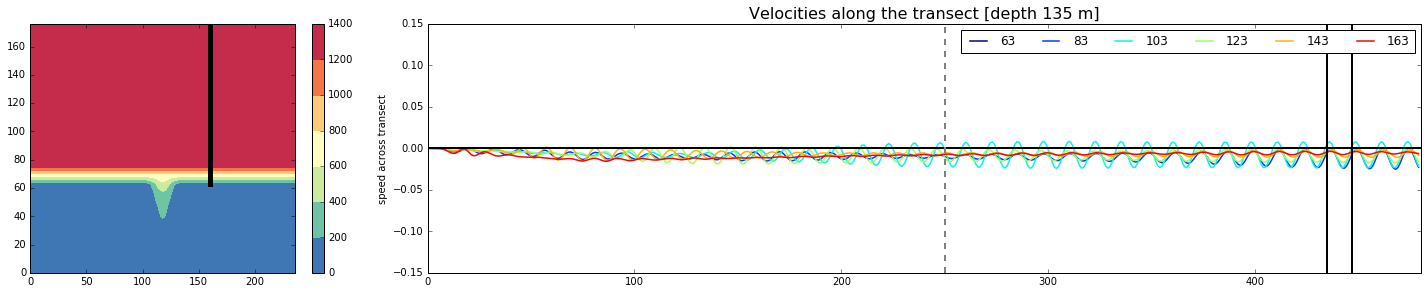

In [10]:
fig, ax2 = functions_velocity.plot_speed_evolution(U, V, bathy, depth_levels, constant, p_min, p_max, 9, interval, flag)
ax2.axvline(250, c = 'gray', linewidth=2, linestyle = '--')

No change.

period [hrs]:  12


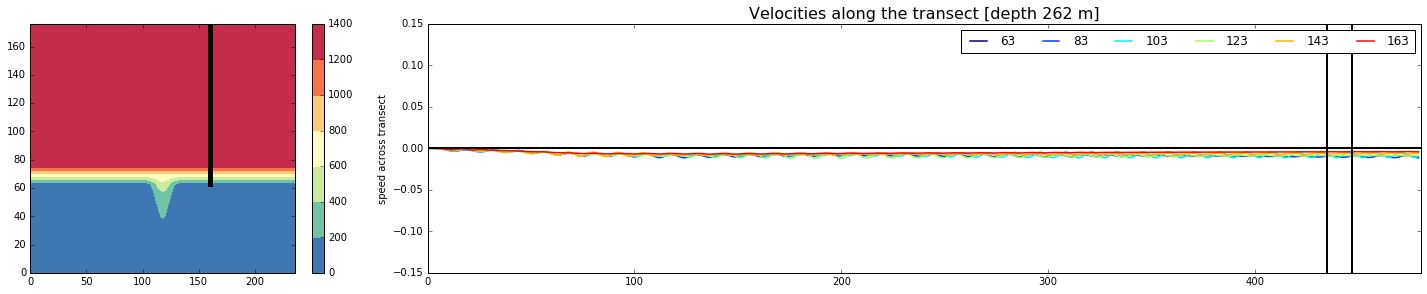

In [11]:
fig, ax2 = functions_velocity.plot_speed_evolution(U, V, bathy, depth_levels, constant, p_min, p_max, 12, interval, flag)

### Along EW transect for varying depths

period [hrs]:  12


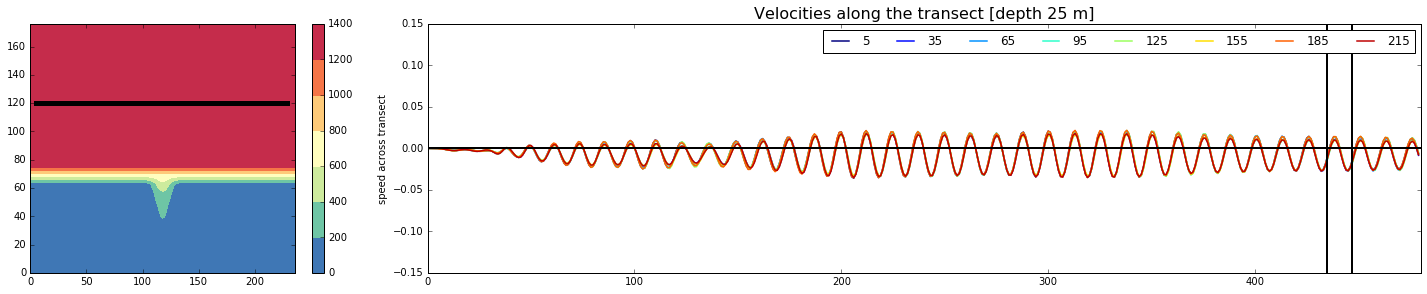

In [12]:
constant, p_min, p_max, depth_ind, interval, flag = 120, 5, 230, 2, 30, 'horizontal_vel'
fig, ax2 = functions_velocity.plot_speed_evolution(U, V, bathy, depth_levels, constant, p_min, p_max, depth_ind, interval, flag)

period [hrs]:  12


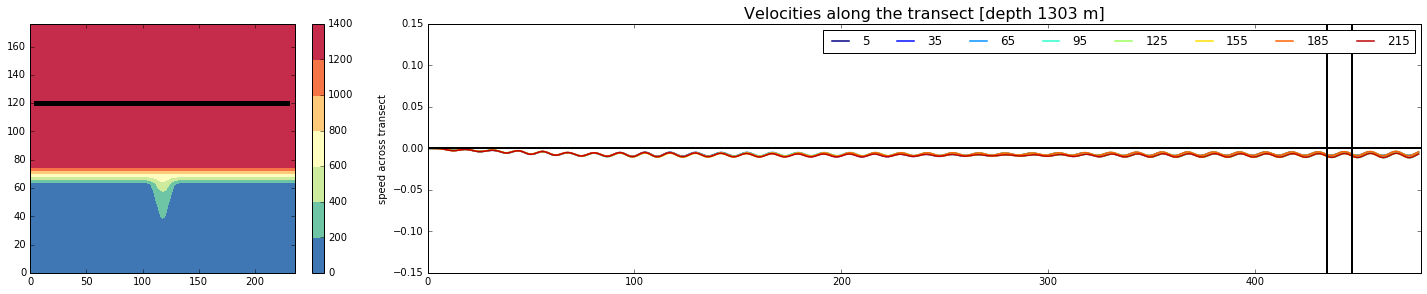

In [13]:
constant, p_min, p_max, depth_ind, interval, flag = 120, 5, 230, 19, 30, 'horizontal_vel'
fig, ax2 = functions_velocity.plot_speed_evolution(U, V, bathy, depth_levels, constant, p_min, p_max, depth_ind, interval, flag)

period [hrs]:  12


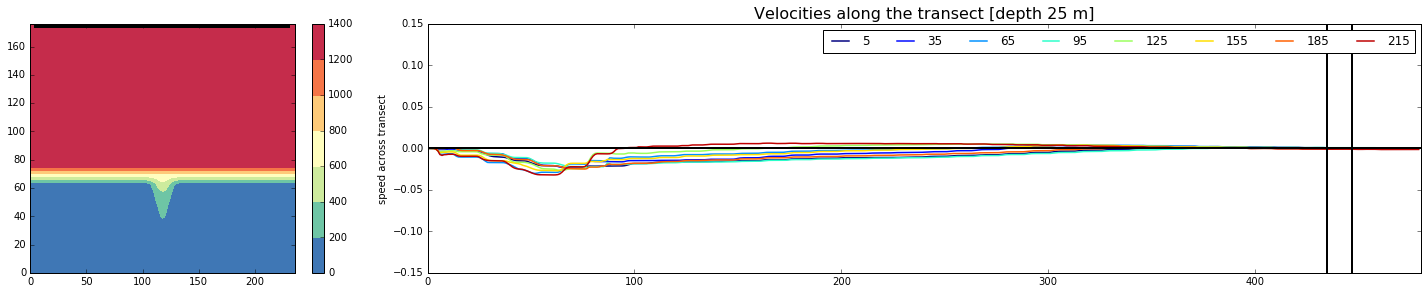

In [6]:
constant, p_min, p_max, depth_ind, interval, flag = 175, 5, 230, 2, 30, 'horizontal_vel'
fig, ax2 = functions_velocity.plot_speed_evolution(U, V, bathy, depth_levels, constant, p_min, p_max, depth_ind, interval, flag)

period [hrs]:  12


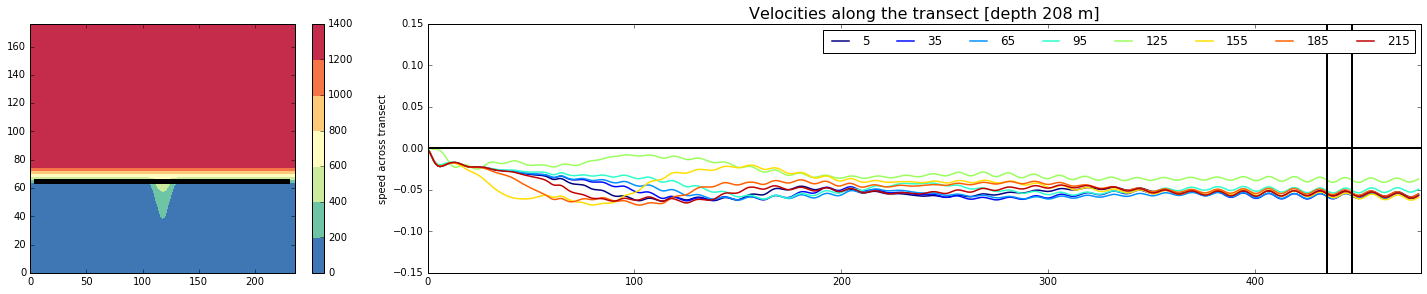

In [15]:
constant, p_min, p_max, depth_ind, interval, flag = 65, 5, 230, 11, 30, 'horizontal_vel'
fig, ax2 = functions_velocity.plot_speed_evolution(U, V, bathy, depth_levels, constant, p_min, p_max, depth_ind, interval, flag)

period [hrs]:  12


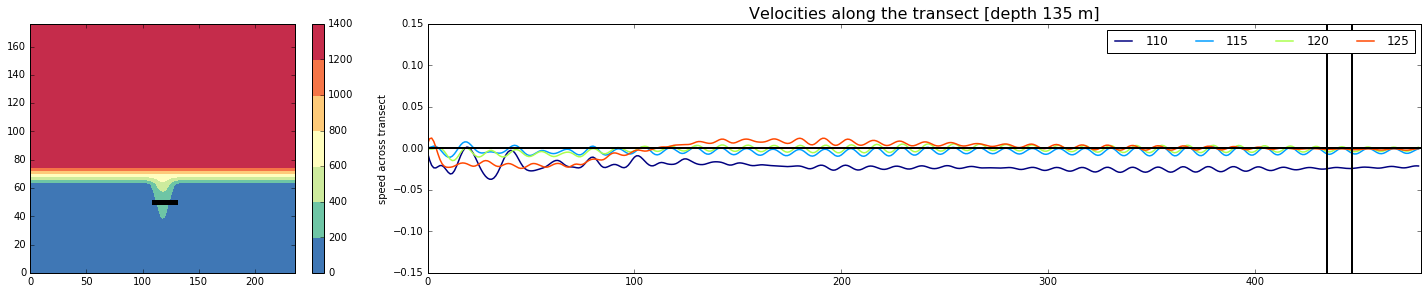

In [16]:
constant, p_min, p_max, depth_ind, interval, flag = 50, 110, 130, 9, 5, 'horizontal_vel'
fig, ax2 = functions_velocity.plot_speed_evolution(U, V, bathy, depth_levels, constant, p_min, p_max, depth_ind, interval, flag)

# U over the whole domain (15 m)

The lower viscosity widens the orange strip.

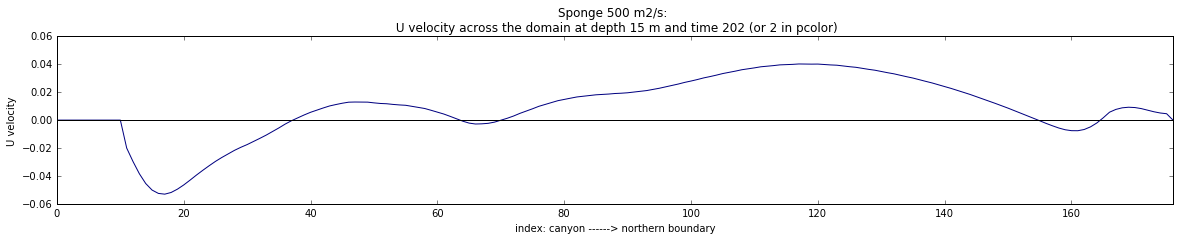

In [17]:
fig, ax = plt.subplots(1,1,figsize=(20,3))
ax.plot(U[202,1,:,200], c='navy')
ax.axhline(0, c='k')
ax.set_xlim([0, U.shape[2]-1])
ax.set_xlabel('index: canyon ------> northern boundary')
ax.set_ylabel('U velocity')
ax.set_title('Sponge 500 m2/s: \n U velocity across the domain at depth 15 m and time 202 (or 2 in pcolor)')

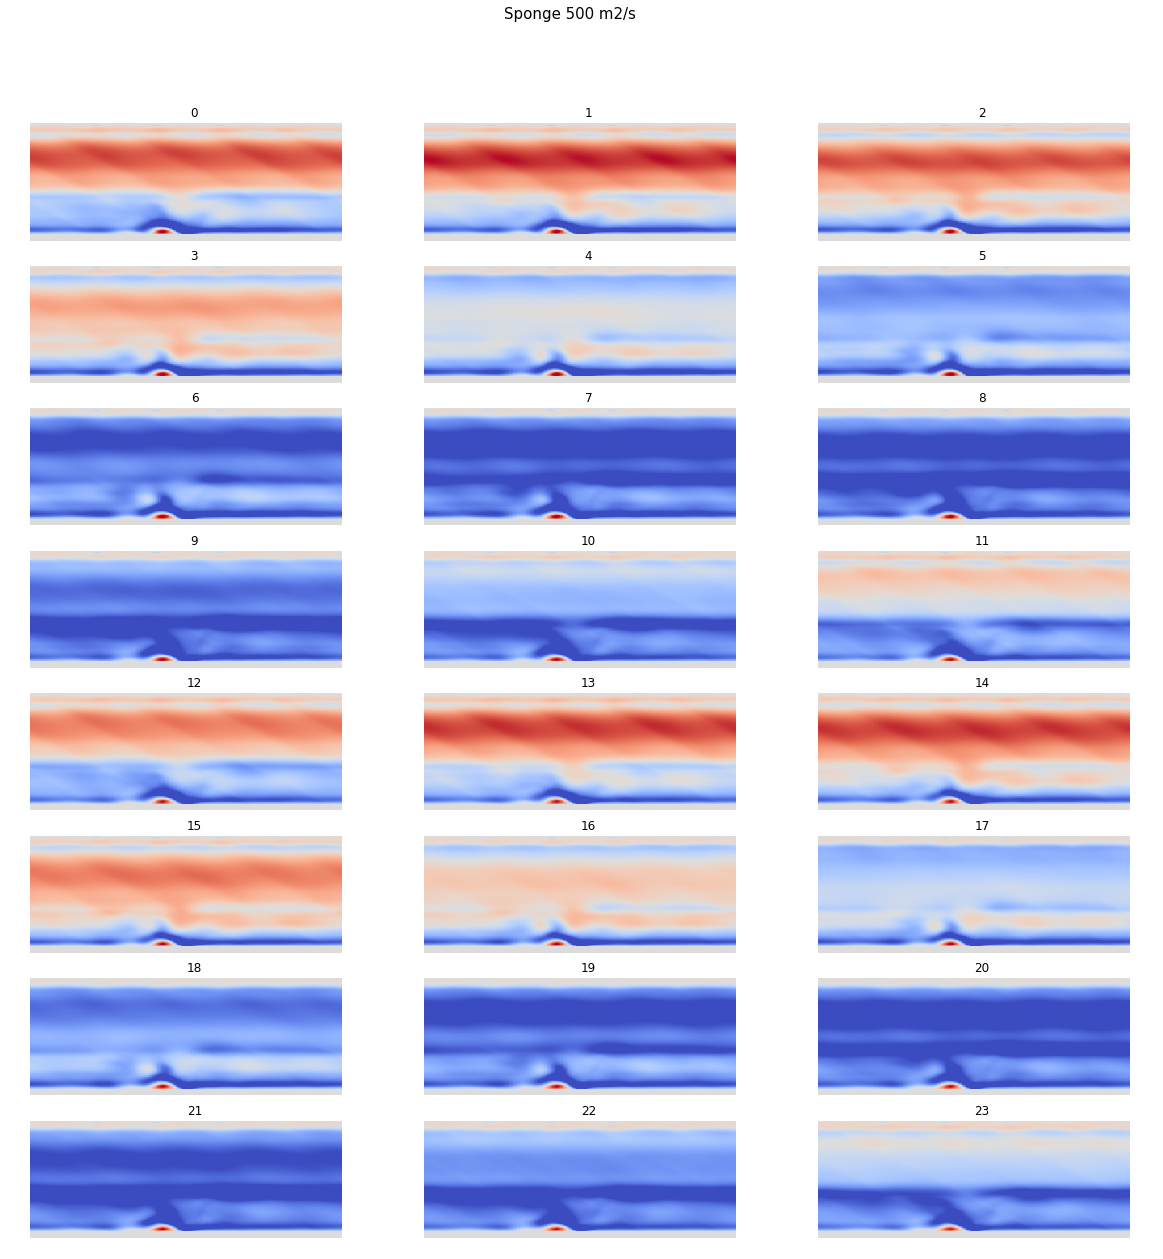

In [18]:
fig, ax = plt.subplots(8,3,figsize=(20,20)) #15
ax = ax.flatten()
for n, t_ind in zip(np.arange(24), np.arange(200, 224)):
    c = ax[n].pcolor(U[t_ind,1,:,:], cmap='coolwarm', vmin=-0.05, vmax=0.05)
    ax[n].set_title(str(n))
    ax[n].axis('off')
fig.suptitle('Sponge 500 m2/s', fontsize=15)

# U over the whole domain (90 m)

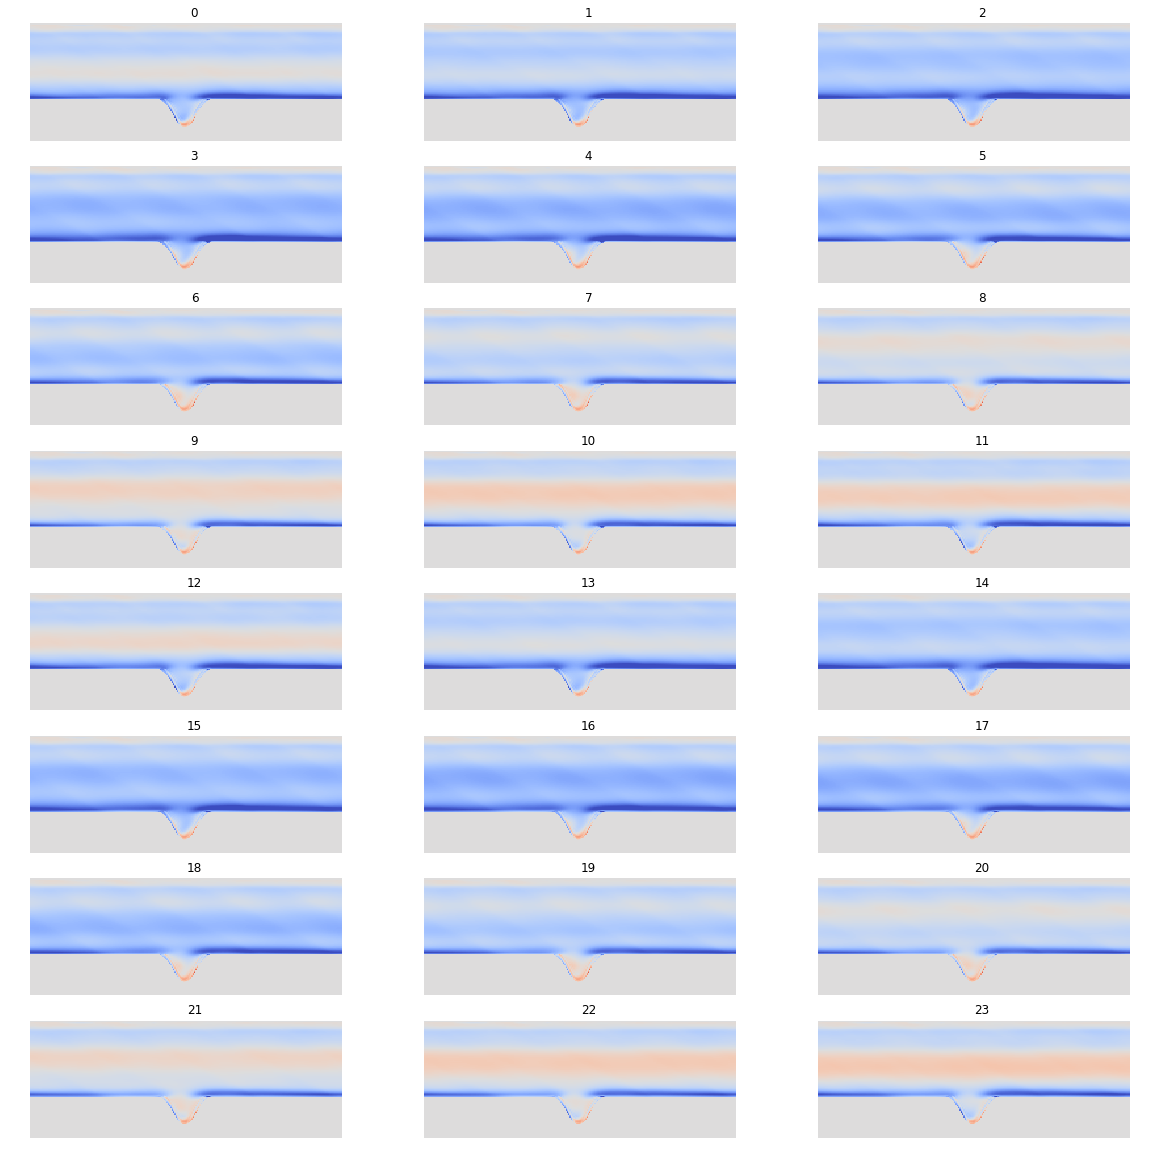

In [19]:
fig, ax = plt.subplots(8,3,figsize=(20,20))
ax = ax.flatten()
for n, t_ind in zip(np.arange(24), np.arange(200, 224)):
    c = ax[n].pcolor(U[t_ind,7,:,:], cmap='coolwarm', vmin=-0.05, vmax=0.05)
    ax[n].set_title(str(n))
    ax[n].axis('off')

# V over the whole domain (15 m)

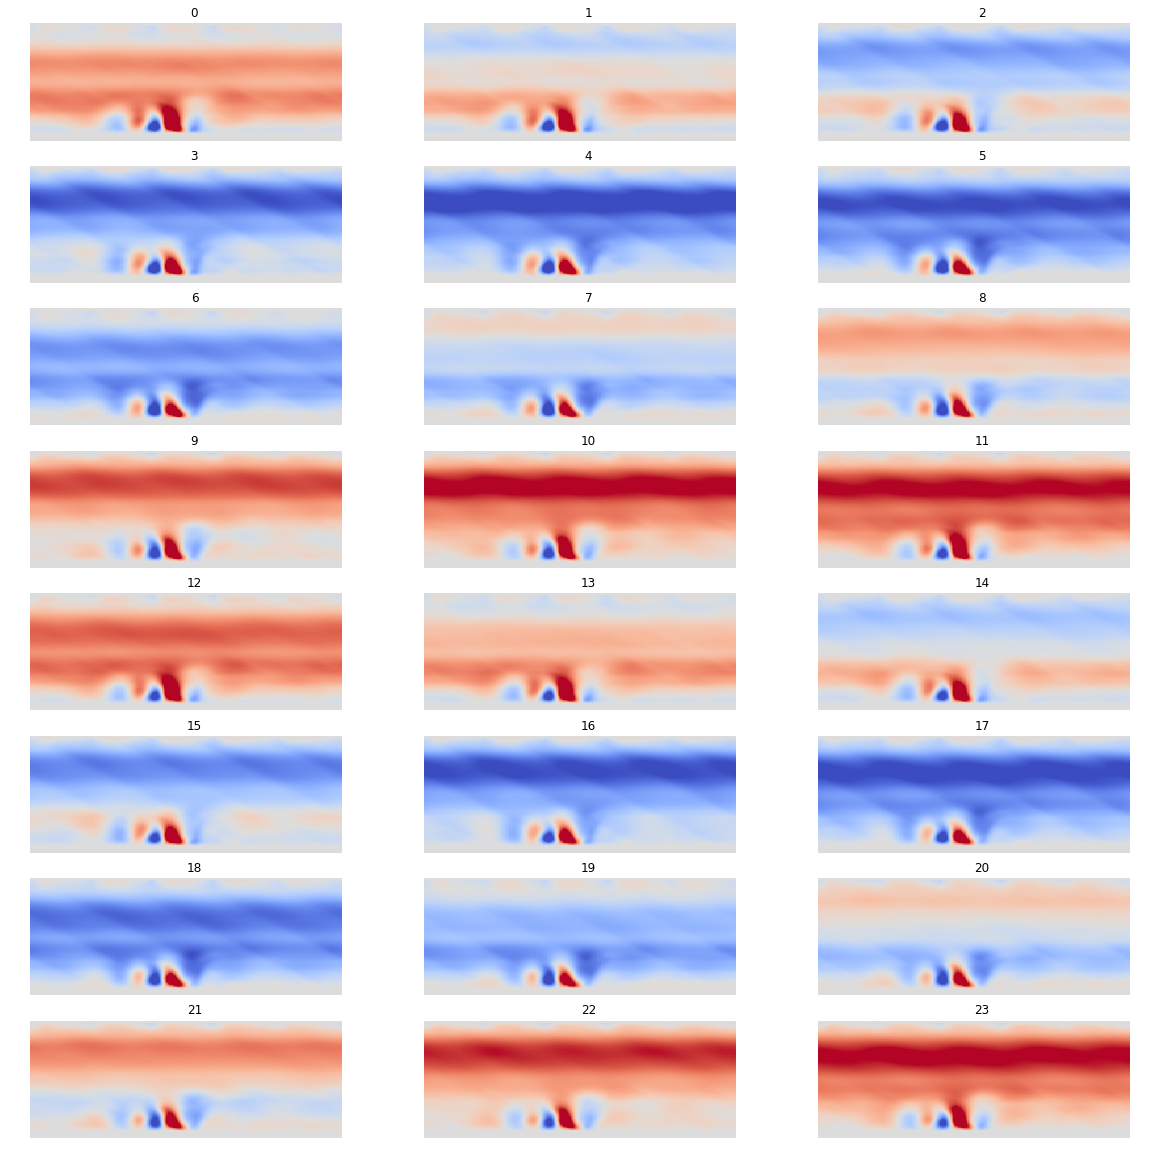

In [20]:
fig, ax = plt.subplots(8,3,figsize=(20,20))
ax = ax.flatten()
for n, t_ind in zip(np.arange(24), np.arange(200, 224)):
    c = ax[n].pcolor(V[t_ind,1,:,:], cmap='coolwarm', vmin=-0.05, vmax=0.05)
    ax[n].set_title(str(n))
    ax[n].axis('off')

# U and V velocities at different points

In [83]:
U.shape

(480, 30, 177, 237)

In [90]:
def plot_at_y(y_ind, ttl):
    U_avg_top = np.mean(U[:74,0,y_ind,:], axis=1)
    V_avg_top = np.mean(V[:74,0,y_ind,:], axis=1)
    U_avg_mid = np.mean(U[:74,10,y_ind,:], axis=1)
    V_avg_mid = np.mean(V[:74,10,y_ind,:], axis=1)

    fig, ([ax1, ax2],[ax3, ax4]) = plt.subplots(2,2,figsize=(20,8))
    ax1.plot(U_avg_top); ax2.plot(V_avg_top) 
    ax3.plot(U_avg_mid); ax4.plot(V_avg_mid)
    ax1.set_title('U velocity at 5 m '+ttl); ax1.set_xlabel('time [hrs]')
    ax3.set_title('U velocity at 167 m '+ttl); ax3.set_xlabel('time [hrs]')
    ax2.set_title('V velocity at 5 m '+ttl); ax2.set_xlabel('time [hrs]')
    ax4.set_title('V velocity at 167 m '+ttl); ax4.set_xlabel('time [hrs]')
    plt.subplots_adjust(hspace=0.4)
    return fig

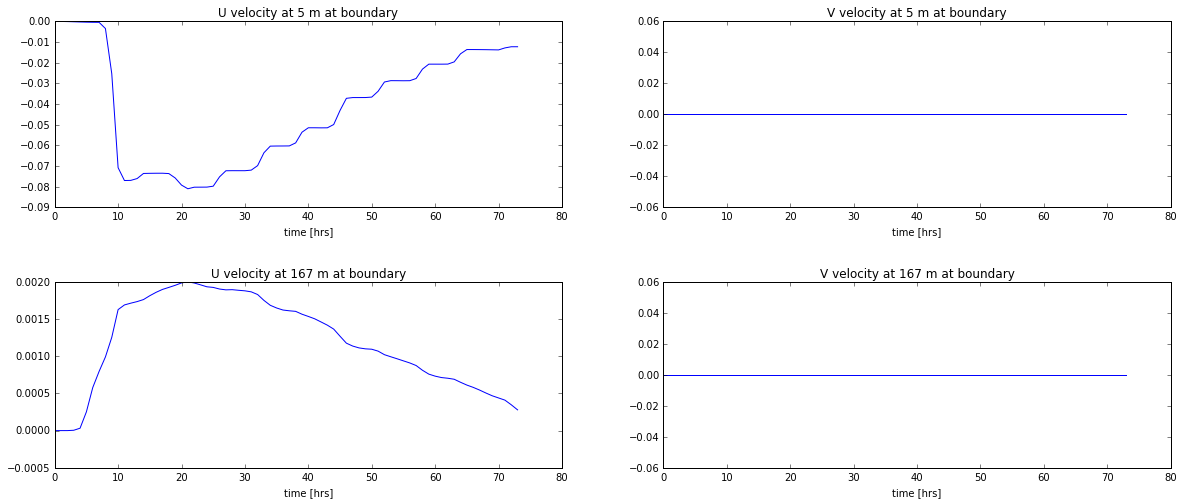

In [94]:
fig = plot_at_y(175, 'at boundary')

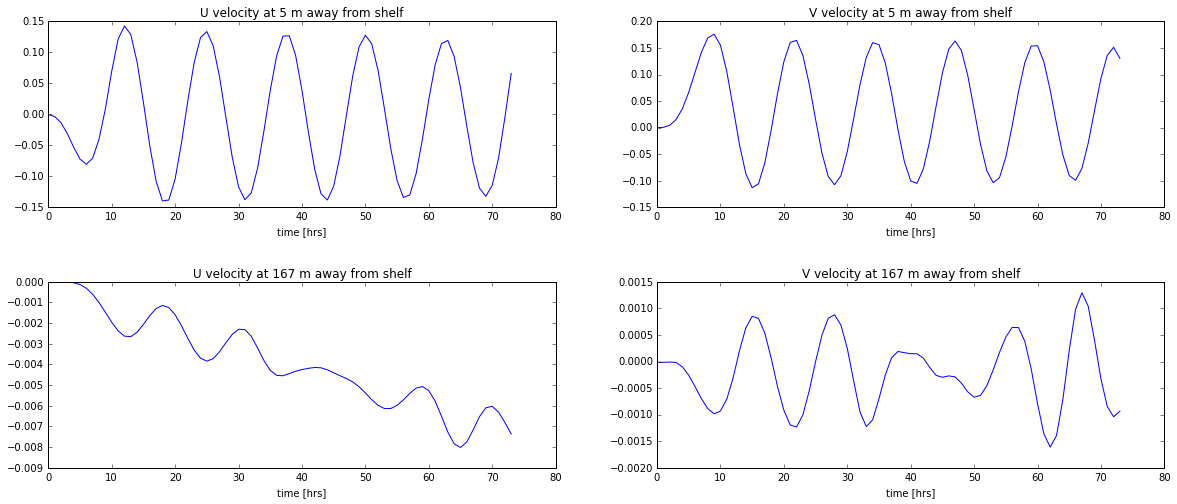

In [95]:
fig = plot_at_y(120, 'away from shelf')